In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


1. Read all attributes data of CelebA.

In [2]:
attr_file_path = "./Anno/list_attr_celeba.txt"
count=0
total_num = 0
attr_names = []
attr_value = []


for line in open(attr_file_path,'r'):
    if count==0:
        total_num = int(line.split()[0])
        count+=1
        continue
    if count==1:
        attr_names = line.split()
        count+=1
        continue
    attr_temp = line.split()
    attr_temp = [int(i) for i in attr_temp[1:]]
    attr_value.append(attr_temp)


print("The number of pic in CelebA : %i"%len(attr_value))
print("The number of face attribute in CelebA : %i"%len(attr_value[0]))

 

The number of pic in CelebA : 202599
The number of face attribute in CelebA : 40


2. Count the number of pic(positive & negative) in each attributes.

In [3]:
attr_value_np = np.array(attr_value)
print(attr_value_np.shape)
pos = []
neg = []

for i in range(40):
    temp_attr = attr_value_np[:,i]
    temp_value = [1 if j==1 else 0 for j in temp_attr]
    temp_value = np.array(temp_value)
    pos.append(temp_value.sum())
    neg.append(total_num - temp_value.sum())

pos = np.array(pos)
neg = np.array(neg)
print(pos.shape)
print(neg.shape)
for p,n in zip(pos,neg):
    if p+n == total_num:
        continue
    else:
        print("wrong.")
print("correct.")
# first_attr = attr_value_np[:,0]
# pos_value = [1 if i == 1 else 0 for i in first_attr]
# print(len(pos_value))
# pos_value = np.array(pos_value)
# print(pos_value.shape)
# total = pos_value.sum()
# print(total)

(202599, 40)
(40,)
(40,)
correct.


3. Check the data distribution of CelebA.

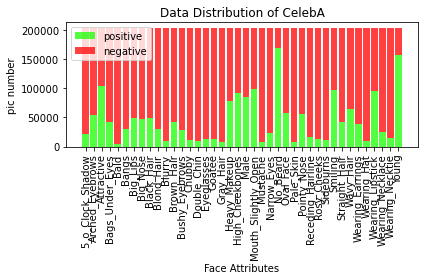

In [4]:
plt.bar(range(len(attr_names)),pos,label='positive',color=(0.1,1,0,0.75))
plt.bar(range(len(attr_names)),neg,label='negative',color=(1,0,0,0.75),bottom=pos,tick_label=attr_names)
plt.xticks(rotation=90,size=10)
plt.title("Data Distribution of CelebA")
plt.xlabel("Face Attributes")
plt.ylabel("pic number")
plt.tight_layout()
plt.legend()
plt.show()

4. The meaning of 40 face attributes.
    1. 5_o_Clock_Shadow：刚长出的双颊胡须
    2. Arched_Eyebrows：柳叶眉
    3. Attractive：吸引人的
    4. Bags_Under_Eyes：眼袋
    5. Bald：秃头
    6. Bangs：刘海
    7. Big_Lips：大嘴唇
    8. Big_Nose：大鼻子
    9. Black_Hair：黑发
    10. Blond_Hair：金发
    11. Blurry：模糊的
    12. Brown_Hair：棕发
    13. Bushy_Eyebrows：浓眉
    14. Chubby：圆胖的
    15. Double_Chin：双下巴
    16. Eyeglasses：眼镜
    17. Goatee：山羊胡子
    18. Gray_Hair：灰发
    19. Heavy_Makeup：浓妆
    20. High_Cheekbones：高颧骨
    21. Male：男性
    22. Mouth_Slightly_Open：微微张开嘴巴
    23. Mustache：胡子，髭
    24. Narrow_Eyes：细长的眼睛
    25. No_Beard：无胡子
    26. Oval_Face：椭圆形的脸
    27. Pale_Skin：苍白的皮肤
    28. Pointy_Nose：尖鼻子
    29. Receding_Hairline：发际线后移
    30. Rosy_Cheeks：红润的双颊
    31. Sideburns：连鬓胡子
    32. Smiling：微笑
    33. Straight_Hair：直发
    34. Wavy_Hair：卷发
    35. Wearing_Earrings：戴着耳环
    36. Wearing_Hat：戴着帽子
    37. Wearing_Lipstick：涂了唇膏
    38. Wearing_Necklace：戴着项链
    39. Wearing_Necktie：戴着领带
    40. Young：年轻人




5. Example: Check hair-color-style attributes.(9/10/12/18)
    - Not mutually exclusive.(Though these attributes seem to belong to the same type)

In [15]:
black = attr_value_np[:,9-1]
blond = attr_value_np[:,10-1]
blown = attr_value_np[:,12-1]
gray = attr_value_np[:,18-1]

bald = attr_value_np[:,5-1]
wear_hat = attr_value_np[:,36-1]

print(black*blond*blown*gray)
print(black[2])
print(blond[2])
print(blown[2])
print(gray[2])

strange = []
for i,v in enumerate(zip(black,blond,blown,gray)):
    if v[0]*v[1]*v[2]*v[3]==1:
        strange.append(i)
print(len(strange))
print(strange[0])

strange = []
for i,v in enumerate(zip(black,blond,blown,gray,bald,wear_hat)):
    if v[0]*v[1]*v[2]*v[3]*v[4]*v[5]==1:
        strange.append(i)
print(len(strange))
print(strange)
print(strange[0])

5712, 195716, 195718, 195720, 195725, 195726, 195728, 195729, 195730, 195733, 195734, 195737, 195738, 195742, 195747, 195748, 195749, 195753, 195765, 195771, 195774, 195775, 195777, 195779, 195780, 195782, 195783, 195785, 195788, 195791, 195792, 195795, 195802, 195804, 195805, 195806, 195812, 195814, 195816, 195822, 195828, 195830, 195831, 195846, 195847, 195853, 195854, 195857, 195862, 195864, 195866, 195873, 195874, 195875, 195880, 195883, 195884, 195889, 195895, 195896, 195897, 195898, 195901, 195904, 195906, 195907, 195911, 195912, 195914, 195917, 195927, 195928, 195933, 195934, 195935, 195937, 195942, 195944, 195945, 195950, 195952, 195953, 195954, 195955, 195960, 195970, 195971, 195973, 195977, 195979, 195983, 195984, 195986, 195989, 195991, 195994, 195995, 195997, 196001, 196002, 196003, 196009, 196010, 196014, 196016, 196017, 196020, 196021, 196027, 196030, 196031, 196032, 196035, 196038, 196040, 196041, 196042, 196043, 196044, 196045, 196046, 196047, 196049, 196057, 196059, 19